# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [5]:
ft = da['DMDMARTL'].value_counts()
print(ft)

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64


In [6]:
# insert your code here
##Total
da['DMDMARTL_named'] = da.DMDMARTL.replace({1:'married', 2:'widowed',
                                            3:'divorced',4:'separated',
                                            5:'never_married', 
                                            6:'living_with_partner', 
                                            77:'Refused', 99:'Dont_know'})
ft = da['DMDMARTL_named'].value_counts()
print(ft)

married                2780
never_married          1004
divorced                579
living_with_partner     527
widowed                 396
separated               186
Refused                   2
Name: DMDMARTL_named, dtype: int64


In [7]:
##women only slice
women = da.loc[da['RIAGENDR']==2,['DMDMARTL_named']]
womenFt = women['DMDMARTL_named'].value_counts()
print(womenFt)

married                1303
never_married           520
divorced                350
widowed                 296
living_with_partner     262
separated               118
Refused                   1
Name: DMDMARTL_named, dtype: int64


In [8]:
##men only slice
men = da.loc[da['RIAGENDR']==1,['DMDMARTL_named']]
menFt = men['DMDMARTL_named'].value_counts()
print(menFt)

married                1477
never_married           484
living_with_partner     265
divorced                229
widowed                 100
separated                68
Refused                   1
Name: DMDMARTL_named, dtype: int64


In [9]:
#create new df for between 30 and 40
between30and40 = da.loc[(da['RIDAGEYR'] >=30) & (da['RIDAGEYR'] <= 40),: ]

In [10]:
#frequency table for new df
print(between30and40['DMDMARTL_named'].value_counts())

married                560
never_married          217
living_with_partner    143
divorced                70
separated               30
widowed                  5
Refused                  1
Name: DMDMARTL_named, dtype: int64


In [11]:
##frequency of marital status for those between 30 and 40 separated by gender
ft=between30and40.groupby('DMDMARTL_named')['RIAGENDR'].value_counts()
ft = ft.unstack()
ft

RIAGENDR,1,2
DMDMARTL_named,,
Refused,1.0,NaN
divorced,24.0,46.0
living_with_partner,78.0,65.0
married,275.0,285.0
never_married,101.0,116.0
separated,12.0,18.0
widowed,3.0,2.0


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [12]:
da['DMDMARTL_named'].value_counts()

married                2780
never_married          1004
divorced                579
living_with_partner     527
widowed                 396
separated               186
Refused                   2
Name: DMDMARTL_named, dtype: int64

In [13]:
da.groupby('DMDMARTL_named')['RIAGENDR'].value_counts().unstack()

RIAGENDR,1,2
DMDMARTL_named,,
Refused,1,1
divorced,229,350
living_with_partner,265,262
married,1477,1303
never_married,484,520
separated,68,118
widowed,100,296


__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [14]:
###let's look at relative frequency for total pop
a= da.groupby('DMDMARTL_named')['RIAGENDR'].value_counts().unstack()
a = a.apply(lambda x : x/x.sum(), axis=1)
print(a.to_string(float_format='%.3f'))

RIAGENDR                1     2
DMDMARTL_named                 
Refused             0.500 0.500
divorced            0.396 0.604
living_with_partner 0.503 0.497
married             0.531 0.469
never_married       0.482 0.518
separated           0.366 0.634
widowed             0.253 0.747


In [15]:
###let's look at relative frequency for 30 to 40 year olds
b= between30and40.groupby('DMDMARTL_named')['RIAGENDR'].value_counts().unstack()
b = b.apply(lambda x : x/x.sum(), axis=1)
print(b.to_string(float_format='%.3f'))

RIAGENDR                1     2
DMDMARTL_named                 
Refused             1.000   NaN
divorced            0.343 0.657
living_with_partner 0.545 0.455
married             0.491 0.509
never_married       0.465 0.535
separated           0.400 0.600
widowed             0.600 0.400


__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

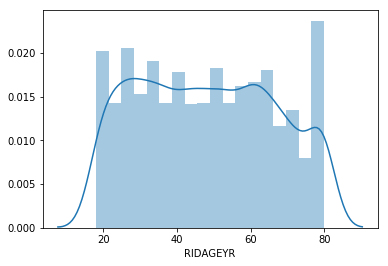

In [16]:
sns.distplot(da['RIDAGEYR'])
plt.show()

In [17]:
# insert your code here
##create age buckets
da['agegroup'] = pd.cut(da.RIDAGEYR, [20,30,40,50,60,70,80])
womenOnly = da.loc[da['RIAGENDR']==2,:]
c =womenOnly.groupby('agegroup')['DMDMARTL_named'].value_counts().unstack()
c = c.apply(lambda x: x/x.sum(), axis = 1)
print(c.to_string(float_format='%.3f'))

DMDMARTL_named  Refused  divorced  living_with_partner  married  never_married  separated  widowed
agegroup                                                                                          
(20, 30]            NaN     0.021                0.206    0.305          0.446      0.021      NaN
(30, 40]            NaN     0.091                0.120    0.544          0.205      0.036    0.004
(40, 50]            NaN     0.137                0.074    0.574          0.125      0.066    0.024
(50, 60]          0.002     0.177                0.068    0.547          0.089      0.057    0.060
(60, 70]            NaN     0.193                0.043    0.481          0.086      0.050    0.147
(70, 80]            NaN     0.144                0.007    0.317          0.051      0.020    0.461


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [18]:
# insert your code here
menOnly = da.loc[da['RIAGENDR']==1,:]
d =menOnly.groupby('agegroup')['DMDMARTL_named'].value_counts().unstack()
d = d.apply(lambda x: x/x.sum(), axis = 1)
print(d.to_string(float_format='%.3f'))

DMDMARTL_named  Refused  divorced  living_with_partner  married  never_married  separated  widowed
agegroup                                                                                          
(20, 30]            NaN     0.005                0.213    0.238          0.523      0.016    0.005
(30, 40]          0.002     0.052                0.157    0.563          0.194      0.026    0.004
(40, 50]            NaN     0.085                0.082    0.703          0.097      0.027    0.005
(50, 60]            NaN     0.126                0.075    0.652          0.104      0.022    0.022
(60, 70]            NaN     0.126                0.050    0.666          0.087      0.032    0.039
(70, 80]            NaN     0.142                0.022    0.612          0.022      0.035    0.167


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [19]:
# insert your code here
da['heightCleaned'] = da.BMXHT.dropna()
da.heightCleaned.describe()

count    5673.000000
mean      166.142834
std        10.079264
min       129.700000
25%       158.700000
50%       166.000000
75%       173.500000
max       202.700000
Name: heightCleaned, dtype: float64

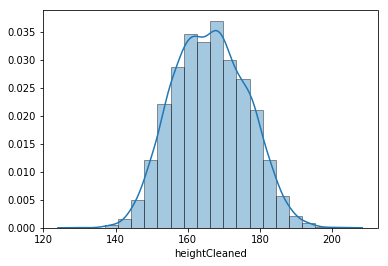

In [20]:
sns.distplot(da.heightCleaned.dropna(), bins= 20, hist_kws=dict(edgecolor='k', linewidth = 1))
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

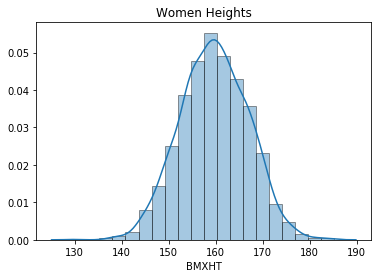

In [21]:
# insert your code here
###women
sns.distplot(womenOnly.BMXHT.dropna(), bins= 20, hist_kws=dict(edgecolor='k', linewidth = 1)).set_title('Women Heights')
plt.show()

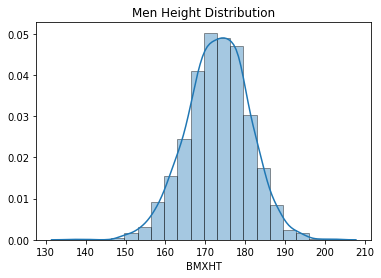

In [22]:
###men
sns.distplot(menOnly.BMXHT.dropna(), bins= 20, hist_kws=dict(edgecolor='k', linewidth = 1)).set_title('Men Height Distribution')
plt.show()

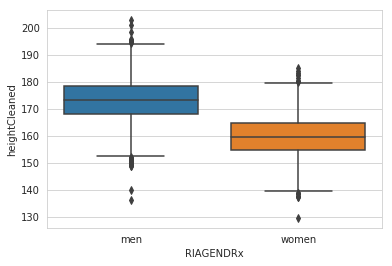

In [23]:
sns.set_style("whitegrid")
da['RIAGENDRx'] = da.RIAGENDR.replace({1:'men',2:'women'})
sns.boxplot(x= da['RIAGENDRx'], y = da['heightCleaned'])
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

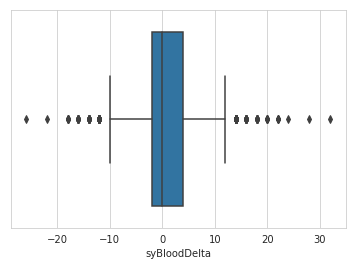

In [24]:
# insert your code here
#creating a new variable for the differences
da['syBloodDelta'] = da.BPXSY1-da.BPXSY2

###boxplot
sns.boxplot(da['syBloodDelta'])
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [25]:
# insert your code here
np.mean(da.syBloodDelta > 0)

0.42946817785527464

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

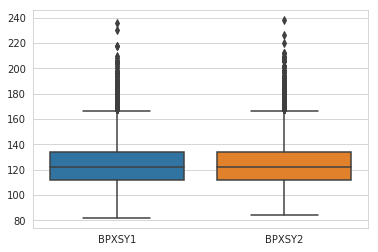

In [27]:
# insert your code here
sns.boxplot(data = da.loc[:,['BPXSY1','BPXSY2']])
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [29]:
# insert your code here
#DMDHHSIZ house hold size
da["edLevel"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
householdByEd = da.groupby('DMDHHSIZ')['edLevel'].value_counts().unstack()
householdByEd = householdByEd.apply(lambda x: x/x.sum(), axis = 1)
print(householdByEd.to_string(float_format='%.3f'))

edLevel   9-11    <9  College  Don't know  HS/GED  Some college/AA
DMDHHSIZ                                                          
1        0.098 0.094    0.254         NaN   0.236            0.319
2        0.094 0.096    0.312       0.001   0.211            0.286
3        0.107 0.098    0.270         NaN   0.207            0.319
4        0.112 0.099    0.258         NaN   0.219            0.312
5        0.145 0.149    0.200       0.002   0.200            0.305
6        0.212 0.206    0.116         NaN   0.227            0.238
7        0.167 0.258    0.106         NaN   0.246            0.222


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [31]:
# insert your code here
between30and40 = da.loc[(da['RIDAGEYR'] >=30) & (da['RIDAGEYR'] <= 40),: ]
householdByEd = da.groupby(['edLevel','RIAGENDRx'])['DMDHHSIZ'].median()
householdByEd

edLevel          RIAGENDRx
9-11             men          3.0
                 women        4.0
<9               men          4.0
                 women        4.0
College          men          2.0
                 women        3.0
Don't know       men          3.5
                 women        2.0
HS/GED           men          3.0
                 women        3.0
Some college/AA  men          3.0
                 women        3.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [33]:
# insert your code here
da.loc[:,['SDMVSTRA','SDMVPSU']].head()

,SDMVSTRA,SDMVPSU
0,125,1
1,125,1
2,131,1
3,131,1
4,126,2


In [38]:
da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx'])['RIDAGEYR','BMXBMI','BMXHT'].mean()

RIDAGEYR     BMXBMI       BMXHT
SDMVSTRA SDMVPSU RIAGENDRx                                  
119      1       men        47.861111  26.958333  172.741667
                 women      47.663265  30.052041  159.570408
         2       men        54.363636  27.160465  172.906818
                 women      52.987952  27.849398  159.244578
120      1       men        43.130000  30.939175  169.537755
                 women      43.636364  32.419388  155.402041
         2       men        45.219178  27.727397  173.075342
                 women      43.736111  27.400000  159.218056
121      1       men        46.750000  29.416505  172.177885
                 women      44.397959  30.856842  158.871579
         2       men        42.063158  26.273118  174.764516
                 women      44.376344  26.470968  160.229032
122      1       men        44.653061  28.528866  173.998969
                 women      42.897436  29.447436  161.315385
         2       men        44.320000  25.744444  170.332323
                 women      47.333333  26.611111  157.231111
123      1       men        47.829787  29.231522  174.315217
                 women      44.841121  29.905769  162.059615
         2       men        52.126582  28.811392  174.454430
                 women      46.457447  30.641489  160.476596
124      1       men        50.750000  28.614414  172.109009
                 women      51.664000  29.533065  158.788710
         2       men        48.245614  27.714035  174.291228
                 women      42.541667  28.640845  162.853521
125      1       men        55.165289  29.727731  173.631092
                 women      50.900901  30.385321  160.762385
         2       men        49.705882  29.143564  174.456863
                 women      51.660000  28.564286  160.021429
126      1       men        48.416667  29.033333  175.149398
                 women      46.229167  31.262500  160.387500
         2       men        48.666667  29.039130  174.713043
                 women      47.205882  29.612121  160.892000
127      1       men        53.137931  31.062353  171.545349
                 women      49.694444  32.189720  157.422430
         2       men        54.070588  30.557831  173.366667
                 women      51.486239  30.770642  159.022936
128      1       men        53.673267  31.749000  169.325000
                 women      55.638462  32.303125  156.339062
         2       men        45.822785  26.835443  172.400000
                 women      45.589744  27.491026  160.437179
129      1       men        43.922222  26.493182  171.094318
                 women      45.329787  29.019149  156.900000
         2       men        45.775510  28.961702  173.138298
                 women      43.500000  29.429630  161.034259
130      1       men        50.516854  30.337079  176.974157
                 women      47.810526  30.700000  161.977895
         2       men        50.535354  29.237755  175.061224
                 women      50.833333  31.490385  160.060577
131      1       men        53.140187  28.259615  175.610476
                 women      54.893617  30.061702  161.989362
         2       men        46.778846  30.077885  175.091346
                 women      45.000000  32.984127  161.673810
132      1       men        42.380435  28.546154  172.534066
                 women      43.210526  29.848421  161.508421
         2       men        49.038760  28.966667  172.809524
                 women      51.700000  30.540625  159.138281
133      1       men        44.054795  27.495833  171.509722
                 women      45.105882  27.959259  158.295122
         2       men        47.489796  27.966667  171.179167
                 women      47.063158  29.000000  158.627368

In [51]:
newDf = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx'])['RIDAGEYR','BMXBMI','BMXHT'].mean()
testDf = newDf.reset_index()
testDf

,SDMVSTRA,SDMVPSU,RIAGENDRx,RIDAGEYR,BMXBMI,BMXHT
0,119,1,men,47.861111,26.958333,172.741667
1,119,1,women,47.663265,30.052041,159.570408
2,119,2,men,54.363636,27.160465,172.906818
3,119,2,women,52.987952,27.849398,159.244578
4,120,1,men,43.130000,30.939175,169.537755
5,120,1,women,43.636364,32.419388,155.402041
6,120,2,men,45.219178,27.727397,173.075342
7,120,2,women,43.736111,27.400000,159.218056
8,121,1,men,46.750000,29.416505,172.177885
9,121,1,women,44.397959,30.856842,158.871579


In [57]:
print(testDf.loc[:,['BMXBMI']].max()/testDf.loc[:,['BMXBMI']].min())
print(testDf.loc[:,['RIDAGEYR']].max()/testDf.loc[:,['RIDAGEYR']].min())
print(testDf.loc[:,['BMXHT']].max()/testDf.loc[:,['BMXHT']].min())

BMXBMI    1.281213
dtype: float64
RIDAGEYR    1.322736
dtype: float64
BMXHT    1.138815
dtype: float64


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [61]:
# insert your code here
from scipy import stats 
stats.iqr(testDf.loc[:,['BMXBMI']])

2.45933226087325

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.